In [1]:
# ra 06h30m32.79s
# dec +29d40m20.16s
# gaia and tic taken with photometry, should be better to take values from spectroscopy
# for us we take BONOMO article. in the paper we should put every important parameter of the star

In [2]:
%matplotlib widget
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

In [3]:
# we define a common directory name
sector20_lcf = "wasp12_tess_0020_lc.fits"
sector43_lcf = "wasp12_tess_0043_lc.fits"
sector44_lcf = "wasp12_tess_0044_lc.fits"
sector45_lcf = "wasp12_tess_0045_lc.fits"
sector71_lcf = "wasp12_tess_0071_lc.fits"
sector72_lcf = "wasp12_tess_0072_lc.fits"

In [4]:
fits.info(sector44_lcf)

Filename: wasp12_tess_0044_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   17466R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [5]:
lchdu = fits.open(sector44_lcf)
lchdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [6]:
bjd_tdb = lchdu[1].data['TIME'] + lchdu[1].header['BJDREFI'] + lchdu[1].header['BJDREFF']
sap_flux = lchdu[1].data['SAP_FLUX']
sap_flux_error = lchdu[1].data['SAP_FLUX_ERR']
pdcsap_flux = lchdu[1].data['PDCSAP_FLUX']
pdcsap_flux_error = lchdu[1].data['PDCSAP_FLUX_ERR']
quality_bitmask = lchdu[1].data['QUALITY']

In [7]:
print('BJDREFI header value:  {1:d}, comment: {0:s}'.format(lchdu[1].header.comments['BJDREFI'], lchdu[1].header['BJDREFI']))
print('BJDREFF header value: {1:f}, comment: {0:s}'.format(lchdu[1].header.comments['BJDREFF'], lchdu[1].header['BJDREFF']))

BJDREFI header value:  2457000, comment: integer part of BTJD reference date
BJDREFF header value: 0.000000, comment: fraction of the day in BTJD reference date


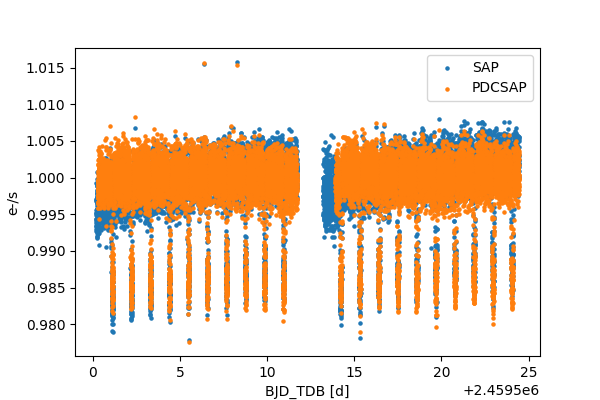

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb, sap_flux/np.nanmedian(sap_flux), s=5, label='SAP')
plt.scatter(bjd_tdb, pdcsap_flux/np.nanmedian(pdcsap_flux), s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.legend()
plt.show()

In [9]:
print('Number of BJD epochs   :', np.shape(bjd_tdb))
print('Number of SAP epochs   :', np.shape(sap_flux))
print('Number of PDCSAP epochs:', np.shape(pdcsap_flux))

Number of BJD epochs   : (17466,)
Number of SAP epochs   : (17466,)
Number of PDCSAP epochs: (17466,)


In [10]:
finite_selection = np.isfinite(pdcsap_flux)
np.sum(finite_selection)

15779

In [11]:
#check tess manual for quality flag description

In [12]:
conservative_selection =  ~(quality_bitmask > 0) & finite_selection

In [13]:
conservative_selection

array([False, False, False, ...,  True,  True,  True])

In [14]:
flags_to_be_checked = np.array([1,2,3,4,5,6,8,10,13,15])
reference_bitmask_in_decimal_system = 0
for v in flags_to_be_checked:
    reference_bitmask_in_decimal_system += 2**(v-1)

index_example_observation = 3
    
print('Value corresponding to the active flags {0:16d}'.format(reference_bitmask_in_decimal_system))
print('example quality bitmask                 {0:16d}'.format(quality_bitmask[index_example_observation]))
print()
print('binary representation of the selected flags    {0:16d}'.format(int(np.binary_repr(reference_bitmask_in_decimal_system))))
print('binary representation of the selected example  {0:16d}'.format(int(np.binary_repr(quality_bitmask[index_example_observation]))))
print()

print('Are we supposed to exclude this point?  {0:}'.format(np.bitwise_and(quality_bitmask[index_example_observation], reference_bitmask_in_decimal_system)> 0))

selective_selection = ~(np.bitwise_and(quality_bitmask, reference_bitmask_in_decimal_system) > 0) & finite_selection

Value corresponding to the active flags            21183
example quality bitmask                               32

binary representation of the selected flags     101001010111111
binary representation of the selected example            100000

Are we supposed to exclude this point?  True


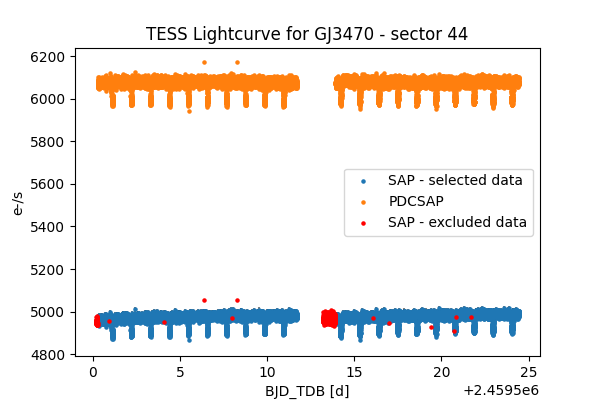

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(bjd_tdb[conservative_selection], sap_flux[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(bjd_tdb, pdcsap_flux, s=5, label='PDCSAP')
plt.scatter(bjd_tdb[~conservative_selection], sap_flux[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(bjd_tdb[conservative_selection], sap_flux[conservative_selection],
            yerr=sap_flux_error[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for GJ3470 - sector 44", fontsize = 12)

plt.legend()

In [16]:
time_array = bjd_tdb

final_selection = conservative_selection & (time_array > 2459500.6)

'''plt.figure(figsize=(6,4))
plt.scatter(time_array[conservative_selection], sap_flux[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(time_array, pdcsap_flux, s=5, label='PDCSAP')


plt.scatter(time_array[~conservative_selection], sap_flux[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.scatter(time_array[~final_selection & conservative_selection], sap_flux[~final_selection & conservative_selection],
            s=20, c='y', marker='x', label='SAP - manually excluded')
plt.errorbar(time_array[conservative_selection], sap_flux[conservative_selection],
            yerr=sap_flux_error[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for GJ3470 - sector 44", fontsize = 12)

#plt.xlim(2459500.15, 2459500.80)
#plt.ylim(10100, 10300)
plt.legend()
plt.show()'''

'plt.figure(figsize=(6,4))\nplt.scatter(time_array[conservative_selection], sap_flux[conservative_selection],\n            s=5, label=\'SAP - selected data\')\nplt.scatter(time_array, pdcsap_flux, s=5, label=\'PDCSAP\')\n\n\nplt.scatter(time_array[~conservative_selection], sap_flux[~conservative_selection],\n            s=5, c=\'r\', label=\'SAP - excluded data\')\nplt.scatter(time_array[~final_selection & conservative_selection], sap_flux[~final_selection & conservative_selection],\n            s=20, c=\'y\', marker=\'x\', label=\'SAP - manually excluded\')\nplt.errorbar(time_array[conservative_selection], sap_flux[conservative_selection],\n            yerr=sap_flux_error[conservative_selection], fmt=\' \', alpha=0.5, \n            ecolor=\'k\', zorder=-1)\nplt.xlabel(\'BJD_TDB [d]\')\nplt.ylabel(\'e-/s\')\nplt.title("TESS Lightcurve for GJ3470 - sector 44", fontsize = 12)\n\n#plt.xlim(2459500.15, 2459500.80)\n#plt.ylim(10100, 10300)\nplt.legend()\nplt.show()'

In [17]:
import pickle
sector44_dictionary = {
    'time': bjd_tdb[final_selection],
    'sap_flux': sap_flux[final_selection],
    'sap_flux_error': sap_flux_error[final_selection],
    'pdcsap_flux': sap_flux[final_selection],
    'pdcsap_flux_error': sap_flux_error[final_selection]
}

pickle.dump(sector44_dictionary, 
            open('wasp12_tess_0044_selected.p','wb'))